In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
autos_data = pd.read_csv('data/autos.csv')
autos_data.head(2)


,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500


In [3]:
X = autos_data.copy()
y = X.pop('price')

#encoding categorical data
for col in X.select_dtypes('object'):
    X[col], _ = X[col].factorize()

discrete_features = X.dtypes == int

In [4]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    discrete_columns = X.columns[discrete_features]
    mi_scores = mutual_info_regression(X[discrete_columns], y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=discrete_columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3] 

curb_weight     0.834081
engine_size     0.538470
drive_wheels    0.327464
aspiration      0.087994
fuel_type       0.048120
make            0.032253
Name: MI Scores, dtype: float64

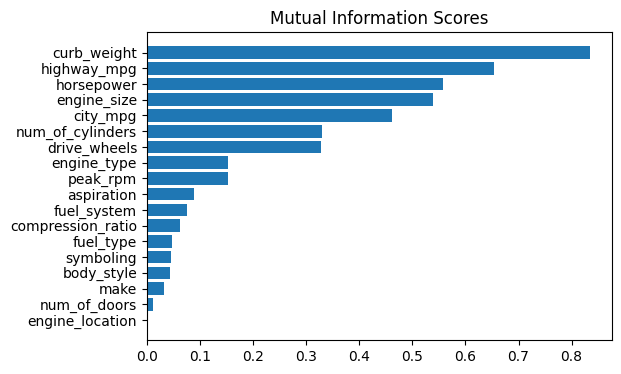

In [5]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width,scores)
    plt.yticks(width,ticks)
    plt.title('Mutual Information Scores')

plt.figure(dpi=100, figsize=(6,4))
plot_mi_scores(mi_scores)

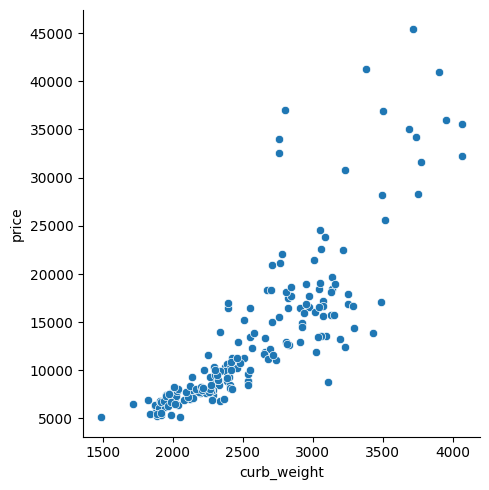

In [6]:
sns.relplot(x='curb_weight', y='price', data=autos_data)

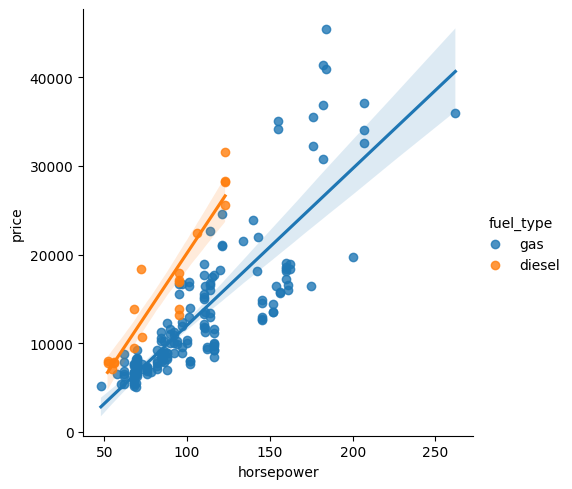

In [7]:
sns.lmplot(x='horsepower', y='price', hue='fuel_type', data=autos_data)

**Exercises**

In [8]:
#dataset ames will be used for this exercise
ames_data = pd.read_csv('data/ames.csv')
ames_data.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YearSold,SaleType,SaleCondition,SalePrice
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141.0,31770.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,None,0.0,5,2010,WD,Normal,215000
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80.0,11622.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,None,0.0,6,2010,WD,Normal,105000


In [9]:
ames_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 79 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        2930 non-null   object 
 1   MSZoning          2930 non-null   object 
 2   LotFrontage       2930 non-null   float64
 3   LotArea           2930 non-null   float64
 4   Street            2930 non-null   object 
 5   Alley             2930 non-null   object 
 6   LotShape          2930 non-null   object 
 7   LandContour       2930 non-null   object 
 8   Utilities         2930 non-null   object 
 9   LotConfig         2930 non-null   object 
 10  LandSlope         2930 non-null   object 
 11  Neighborhood      2930 non-null   object 
 12  Condition1        2930 non-null   object 
 13  Condition2        2930 non-null   object 
 14  BldgType          2930 non-null   object 
 15  HouseStyle        2930 non-null   object 
 16  OverallQual       2930 non-null   object 


In [10]:
def make_mi_scores(X,y):
    X = X.copy()
    for x in X.select_dtypes(['object', 'category']):
        X[x], _ = X[x].factorize()
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X,y,discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [11]:
#utility function from tutorial
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    

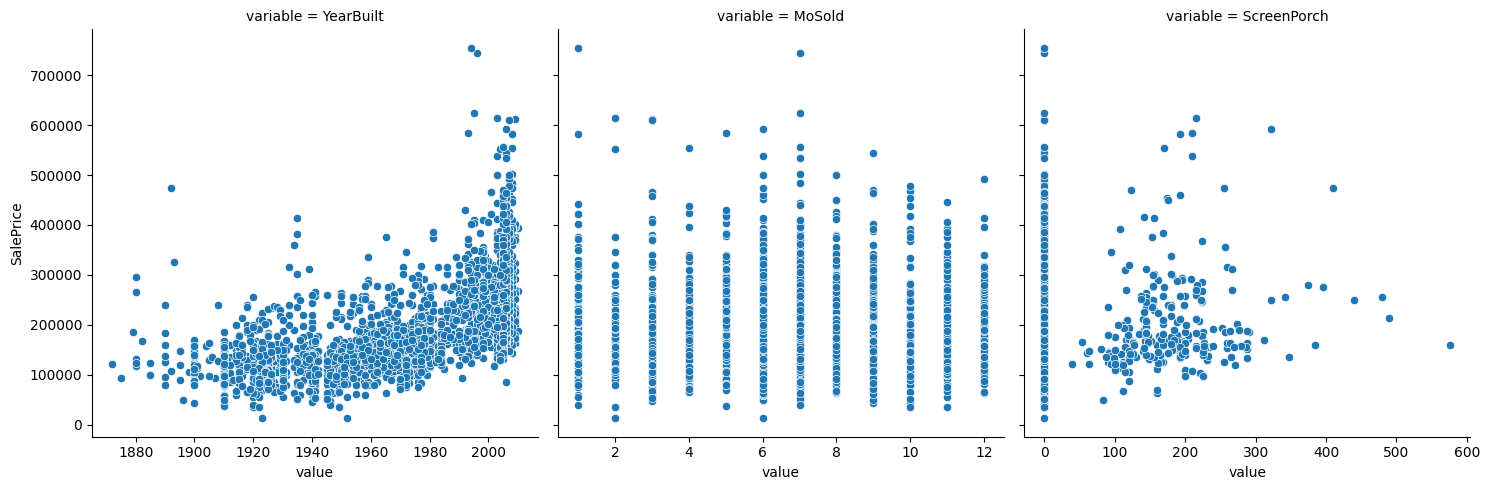

In [12]:
features = ["YearBuilt", "MoSold", "ScreenPorch"]
sns.relplot(
    x="value", y="SalePrice", col="variable", data=ames_data.melt(id_vars="SalePrice", value_vars=features), facet_kws=dict(sharex=False),
);

In [13]:
X = ames_data.copy()
y = X.pop('SalePrice')

mi_scores = make_mi_scores(X,y)

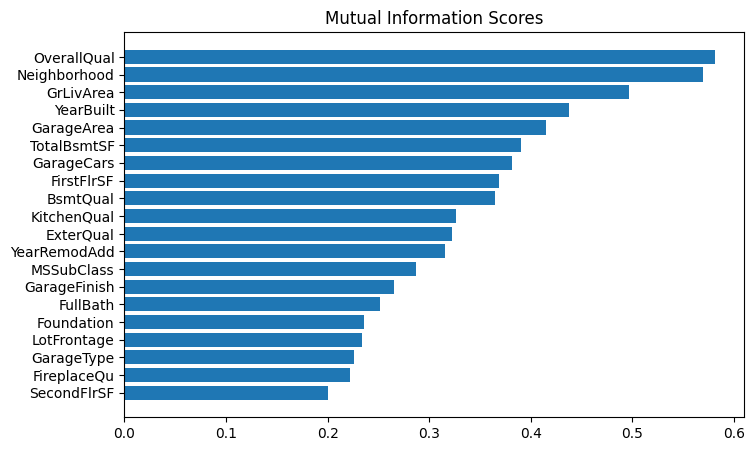

In [14]:
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores.head(20))

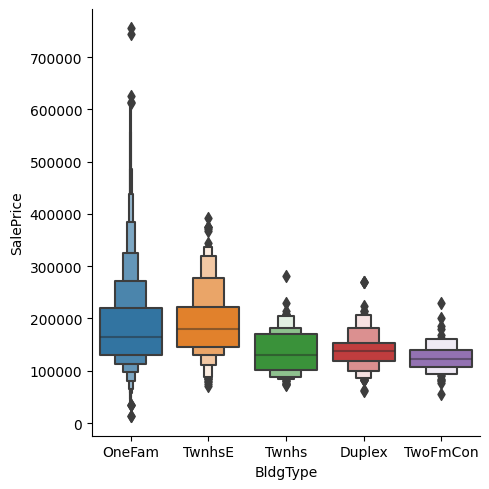

In [15]:
sns.catplot(x='BldgType', y='SalePrice', data=ames_data, kind='boxen')

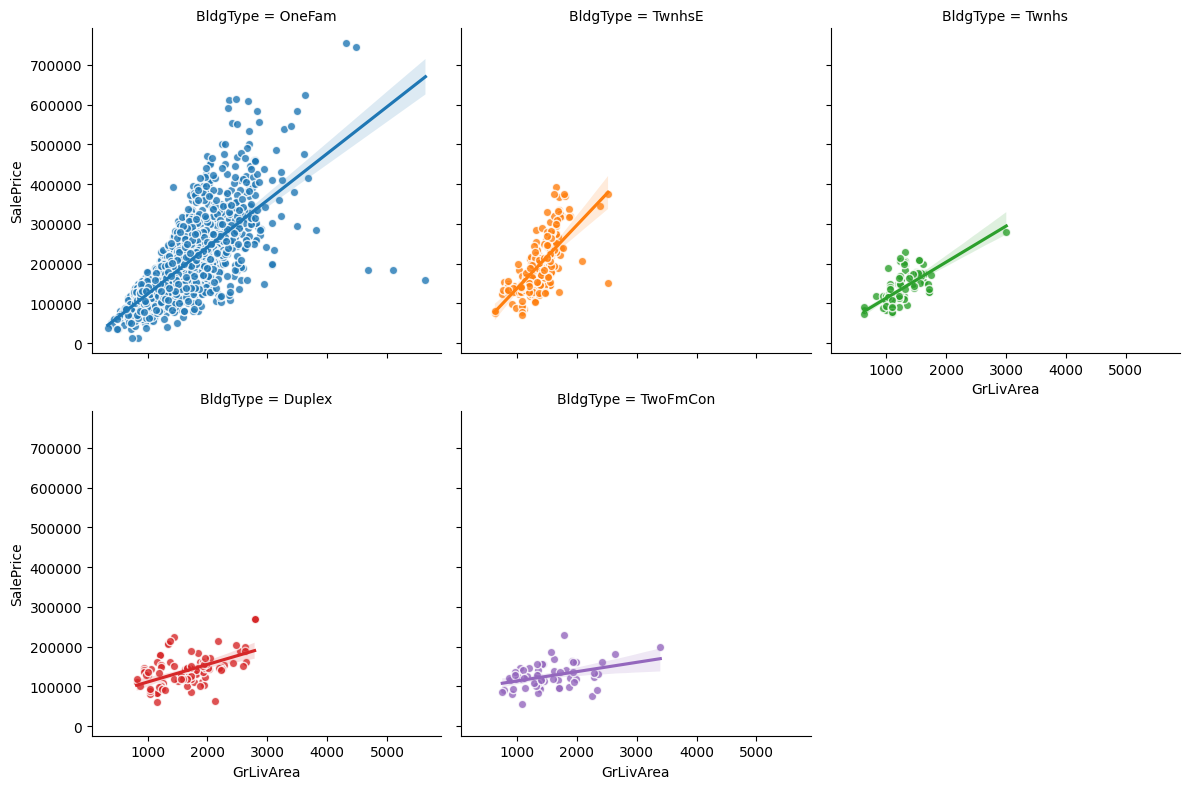

In [16]:
feature = 'GrLivArea'

sns.lmplot(x=feature, y='SalePrice', hue='BldgType', col='BldgType',
                data=ames_data, scatter_kws={'edgecolor': 'w'}, col_wrap=3, height=4)

**Creating Features**

*Tips on Discovering New Features*
- Understand the features. Refer to your dataset's data documentation, if available.
- Research the problem domain to acquire domain knowledge. If your problem is predicting house prices, do some research on real-estate for instance. Wikipedia can be a good starting point, but books and journal articles will often have the best information.
- Study previous work. Solution write-ups from past Kaggle competitions are a great resource.
- Use data visualization. Visualization can reveal pathologies in the distribution of a feature or complicated relationships that could be simplified. Be sure to visualize your dataset as you work through the feature engineering process.

In [17]:
#Read data from csv
accidents_data = pd.read_csv('data/accidents.csv')
autos_data = pd.read_csv('data/autos.csv')
concrete_data = pd.read_csv('data/concrete.csv')
customer_data = pd.read_csv('data/customer.csv')

In [18]:
autos_data['stroke_rasio'] = autos_data.stroke / autos_data.bore

autos_data[['stroke', 'bore', 'stroke_rasio']].head()

,stroke,bore,stroke_rasio
0,2.68,3.47,0.772334
1,2.68,3.47,0.772334
2,3.47,2.68,1.294776
3,3.40,3.19,1.065831
4,3.40,3.19,1.065831


In [19]:
autos_data['displacment'] = (
    np.pi * ((0.5 * autos_data.bore) ** 2) * autos_data.stroke * autos_data.num_of_cylinders
)

<AxesSubplot: xlabel='LogWindSpeed', ylabel='Density'>

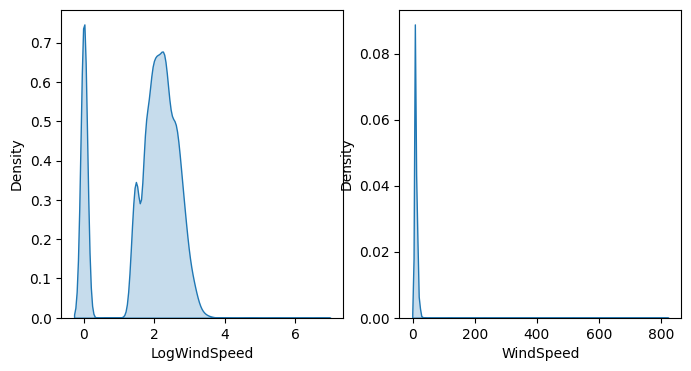

In [20]:
#if the features has 0.0 values, use np.log1p (log(1+x)) instead np.log 
accidents_data['LogWindSpeed'] = accidents_data.WindSpeed.apply(np.log1p)

#plot a comparison
fig, axs = plt.subplots(1,2, figsize=(8,4))

sns.kdeplot(accidents_data.WindSpeed, fill=True, ax=axs[1])
sns.kdeplot(accidents_data.LogWindSpeed, fill=True, ax=axs[0])

*Counts*

In [21]:
roadway_features = ["Amenity", "Bump", "Crossing", "GiveWay",
    "Junction", "NoExit", "Railway", "Roundabout", "Station", "Stop",
    "TrafficCalming", "TrafficSignal"]

accidents_data['RoadwayFeatures'] = accidents_data[roadway_features].sum(axis='columns')

accidents_data[roadway_features + ['RoadwayFeatures']].head(10)

,Amenity,Bump,Crossing,GiveWay,Junction,NoExit,Railway,Roundabout,Station,Stop,TrafficCalming,TrafficSignal,RoadwayFeatures
0,False,False,False,False,False,False,False,False,False,False,False,False,0
1,False,False,False,False,False,False,False,False,False,False,False,False,0
2,False,False,False,False,False,False,False,False,False,False,False,False,0
3,False,False,False,False,False,False,False,False,False,False,False,False,0
4,False,False,False,False,False,False,False,False,False,False,False,False,0
5,False,False,False,False,True,False,False,False,False,False,False,False,1
6,False,False,False,False,False,False,False,False,False,False,False,False,0
7,False,False,True,False,False,False,False,False,False,False,False,True,2
8,False,False,True,False,False,False,False,False,False,False,False,True,2
9,False,False,False,False,False,False,False,False,False,False,False,False,0


In [22]:
components = [ "Cement", "BlastFurnaceSlag", "FlyAsh", "Water",
               "Superplasticizer", "CoarseAggregate", "FineAggregate"]

concrete_data['Components'] = concrete_data[components].gt(0).sum(axis=1)

concrete_data[components + ['Components']].head(10)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Components
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,5
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,5
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,5
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,4


*Building-Up and Breaking-Down Features*

In [23]:
#create 2 new features > from policy features > through string accessor > by spliting on ' ' and expanding the result into separate columns
customer_data[['Type', 'Level']] = (customer_data['Policy'].str.split(' ',expand=True))

customer_data[['Policy','Type', 'Level']].head(10)

,Policy,Type,Level
0,Corporate L3,Corporate,L3
1,Personal L3,Personal,L3
2,Personal L3,Personal,L3
3,Corporate L2,Corporate,L2
4,Personal L1,Personal,L1
5,Personal L3,Personal,L3
6,Corporate L3,Corporate,L3
7,Corporate L3,Corporate,L3
8,Corporate L3,Corporate,L3
9,Special L2,Special,L2


In [24]:
#or join simpe feature into a composed feature if there are a reason
autos_data['make_nad_style'] = autos_data['make'] + '_' + autos_data['body_style']

autos_data[['make', 'body_style', 'make_nad_style']].head()

,make,body_style,make_nad_style
0,alfa-romero,convertible,alfa-romero_convertible
1,alfa-romero,convertible,alfa-romero_convertible
2,alfa-romero,hatchback,alfa-romero_hatchback
3,audi,sedan,audi_sedan
4,audi,sedan,audi_sedan


**Elsewhere on Kaggle Learn**
There are a few other kinds of data we haven't talked about here that are especially rich in information. Fortunately, we've got you covered!
- For dates and times, see Parsing Dates from our Data Cleaning course.
- For latitudes and longitudes, see our Geospatial Analysis course.

**Group Transforms**

In [25]:
customer_data['AvarageIncome'] = (customer_data.groupby('State')['Income'].transform('mean'))

customer_data[['State','Income','AvarageIncome']].head(10)

,State,Income,AvarageIncome
0,Washington,56274,38122.733083
1,Arizona,0,37405.402231
2,Nevada,48767,38369.605442
3,California,0,37558.946667
4,Washington,43836,38122.733083
5,Oregon,62902,37557.283353
6,Oregon,55350,37557.283353
7,Arizona,0,37405.402231
8,Oregon,14072,37557.283353
9,Oregon,28812,37557.283353


In [26]:
customer_data['StateFreq'] = (customer_data.groupby('State')['State'].transform('count') / customer_data.State.count())

customer_data[['State', 'StateFreq']].head()

,State,StateFreq
0,Washington,0.087366
1,Arizona,0.186446
2,Nevada,0.096562
3,California,0.344865
4,Washington,0.087366


You could use a transform like this to create a "frequency encoding" for a categorical feature.

If you're using training and validation splits, to preserve their independence, it's best to create a grouped feature using only the training set and then join it to the validation set. We can use the validation set's merge method after creating a unique set of values with drop_duplicates on the training set:

In [27]:
#Create Split
df_train = customer_data.sample(frac=0.5)
df_valid = customer_data.drop(df_train.index)

#create the avarage claim amount by coverage type on the training

df_train['AvarageClaim'] = df_train.groupby('Coverage')['ClaimAmount'].transform('mean')

#Merge the values into validation set

df_valid = df_valid.merge(df_train[['Coverage','AvarageClaim']].drop_duplicates(), on='Coverage', how='left')

df_valid[['Coverage', 'AvarageClaim']].head(10)

,Coverage,AvarageClaim
0,Basic,374.953265
1,Extended,486.313709
2,Basic,374.953265
3,Basic,374.953265
4,Basic,374.953265
5,Basic,374.953265
6,Basic,374.953265
7,Premium,649.662242
8,Basic,374.953265
9,Basic,374.953265


**Tips on Creating Features**
It's good to keep in mind your model's own strengths and weaknesses when creating features. Here are some guidelines:
- Linear models learn sums and differences naturally, but can't learn anything more complex.
- Ratios seem to be difficult for most models to learn. Ratio combinations often lead to some easy performance gains.
- Linear models and neural nets generally do better with normalized features. Neural nets especially need features scaled to values not too far from 0. Tree-based models (like random forests and XGBoost) can sometimes benefit from normalization, but usually much less so.
- Tree models can learn to approximate almost any combination of features, but when a combination is especially important they can still benefit from having it explicitly created, especially when data is limited.
- Counts are especially helpful for tree models, since these models don't have a natural way of aggregating information across many features at once.

**Exercises**

In [28]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
def score_dataset(X, y, model=XGBRegressor()):
    # Label encoding for categoricals
    for colname in X.select_dtypes(["category", "object"]):
        X[colname], _ = X[colname].factorize()
    # Metric for Housing competition is RMSLE (Root Mean Squared Log Error)
    score = cross_val_score(
        model, X, y, cv=5, scoring="neg_mean_squared_log_error",
    )
    score = -1 * score.mean()
    score = np.sqrt(score)
    return score


# Prepare data
X = ames_data.copy()
y = X.pop("SalePrice")

In [32]:
#1) Create Math Transform

X_1 = pd.DataFrame() # dataframe to hold new features

X_1['LivLotRatio'] = X.GrLivArea / X.LotArea
X_1['Spaciousness'] = (X.FirstFlrSF + X.SecondFlrSF) / X.TotRmsAbvGrd
X_1['TotalOutsideSF'] = X.WoodDeckSF + X.OpenPorchSF + X.EnclosedPorch + X.Threeseasonporch + X.ScreenPorch

In [33]:
# 2) Interaction with a categorical
X_2 = pd.get_dummies(ames_data.BldgType, prefix='Bldg')

#multiply row by row
X_2 = X_2.mul(ames_data.GrLivArea, axis='rows')

In [37]:
# 3) Count features
X_3 = pd.DataFrame()

porche_types = ['WoodDeckSF','OpenPorchSF','EnclosedPorch','Threeseasonporch','ScreenPorch']

X_3['PorchTypes'] = X[porche_types].gt(0.0).sum(axis=1) #gt stand for greater than
X_3.head(4)

,PorchTypes
0,2
1,2
2,2
3,0


In [45]:
#4) Break down a Categorical Feature
ames_data.MSSubClass.unique()

X_4 = pd.DataFrame()

X_4['MSClass'] = X.MSSubClass.str.split('_', n=1,expand=True)[0]

In [43]:
#5) Use a Grouped Transform

X_5 = pd.DataFrame()

X_5['MedNhbdArea'] = X.groupby('Neighborhood')['GrLivArea'].transform('median')
X_5['MedNhbdArea'].head()


0    1200.0
1    1200.0
2    1200.0
3    1200.0
4    1560.0
Name: MedNhbdArea, dtype: float64

In [46]:
X_new = X.join([X_1, X_2, X_3, X_4, X_5])
score_dataset(X_new, y)

0.13865658289209742

_Exercise finished!!_

**Clustering With K-Means**